In [1]:
# 1.Importing libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import reset_ramsey
from statsmodels.graphics.regressionplots import plot_partregress_grid
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro

In [3]:
# 2.Importing CSV, printing top 5 rows and displaying data types
df = pd.read_csv("california_housing.csv")
df.sample(n=700)
df.head()

,SALE_PRC,LAND_SQFOOT,OCEAN_DIST,WATER_DIST,CENTER_DIST,HIGHWAY_DIST,HOUSE_AGE
0,440000.0,9375,12811.4,347.6,42815.3,15954.9,67
1,349000.0,9375,10648.4,337.8,43504.9,18125.0,63
2,800000.0,9375,10574.1,297.1,43530.4,18200.5,61
3,988000.0,12450,10156.5,0.0,43797.5,18514.4,63
4,755000.0,12800,10836.8,326.6,43599.7,17903.4,42


In [5]:
# Describing and Printing data types.
df.dtypes

SALE_PRC        float64
LAND_SQFOOT       int64
OCEAN_DIST      float64
WATER_DIST      float64
CENTER_DIST     float64
HIGHWAY_DIST    float64
HOUSE_AGE         int64
dtype: object

In [6]:
# 3.Describing summary statistics.

df.describe()

,SALE_PRC,LAND_SQFOOT,OCEAN_DIST,WATER_DIST,CENTER_DIST,HIGHWAY_DIST,HOUSE_AGE
count,3.599000e+03,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.00000
mean,3.870463e+05,7920.104751,25465.011281,3420.654265,36014.118783,6982.688886,45.93526
std,3.828527e+05,3360.776915,11440.343873,2804.125012,11776.842316,4958.411583,21.58317
min,7.200000e+04,1471.000000,311.500000,0.000000,3825.600000,96.900000,0.00000
25%,1.820000e+05,6000.000000,18323.750000,1006.800000,28243.700000,3117.800000,26.00000
50%,2.650000e+05,7493.000000,24113.400000,2861.400000,36021.200000,6116.800000,49.00000
75%,4.000000e+05,9000.000000,33191.300000,5160.350000,43776.550000,9593.950000,64.00000
max,2.650000e+06,43976.000000,55685.900000,12203.700000,63232.200000,26935.900000,96.00000


C:\Users\sumnima\anaconda3\StatsAssignmnent\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sumnima\anaconda3\StatsAssignmnent\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sumnima\anaconda3\StatsAssignmnent\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sumnima\anaconda3\StatsAssignmnent\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

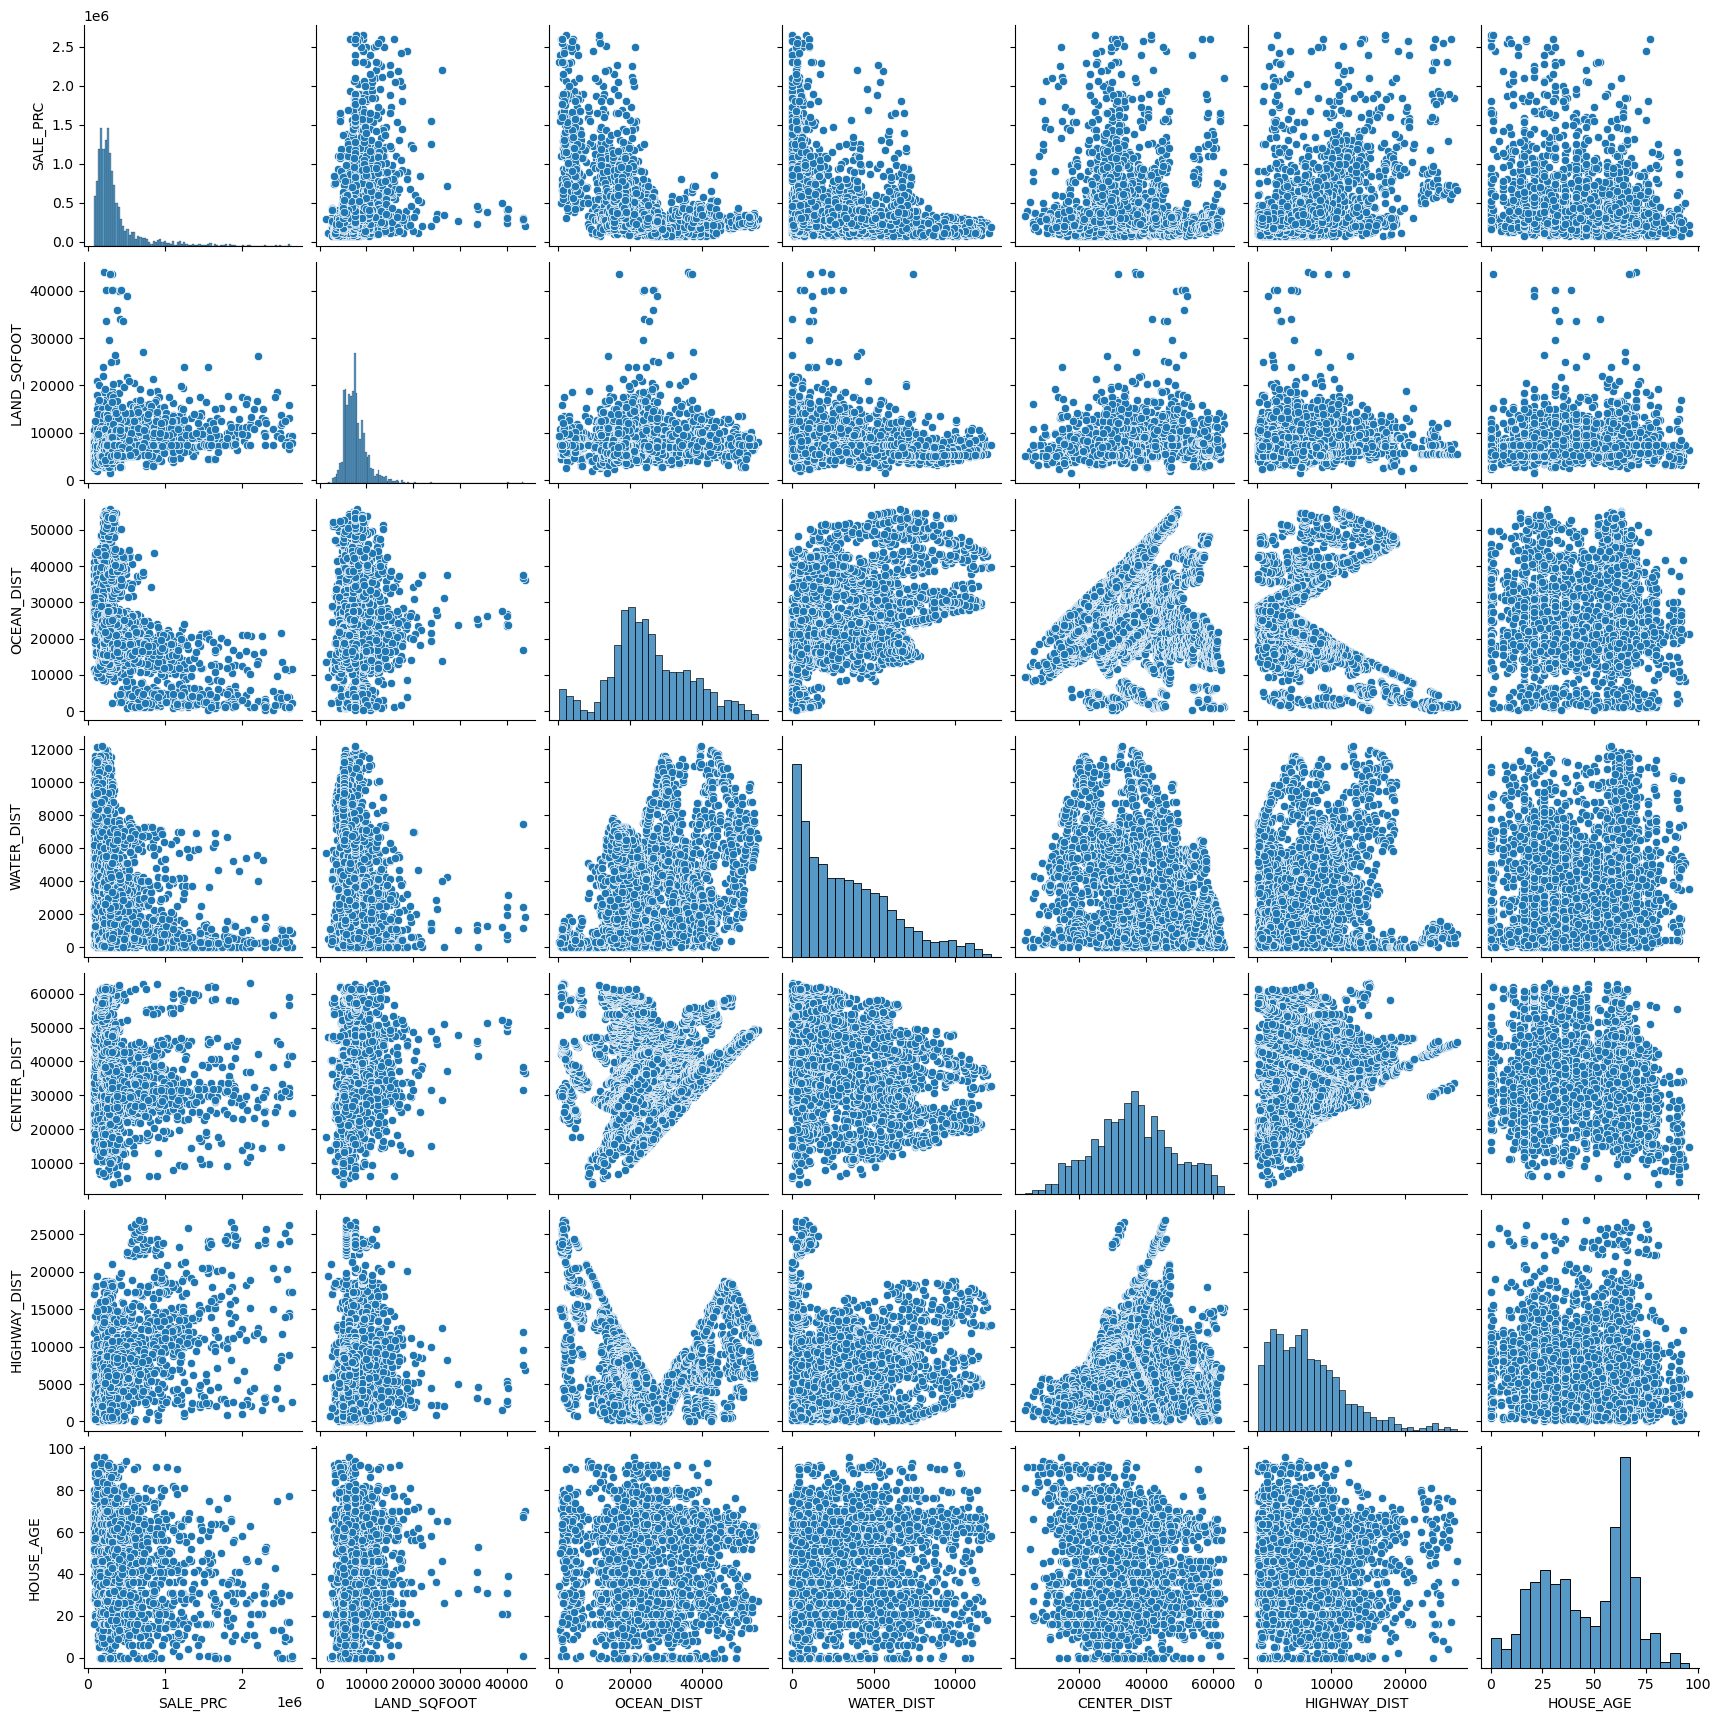

In [7]:
#4.Creating Seaborns pairplot
sns.pairplot(df)

In [33]:
#Splitting dataframe into dependent and independent variables
y = df["SALE_PRC"]
xvars = ["LAND_SQFOOT","OCEAN_DIST","WATER_DIST","CENTER_DIST","HIGHWAY_DIST","HOUSE_AGE"]
X = df[xvars]

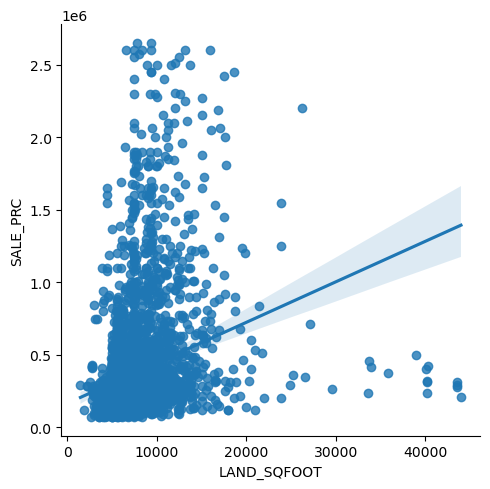

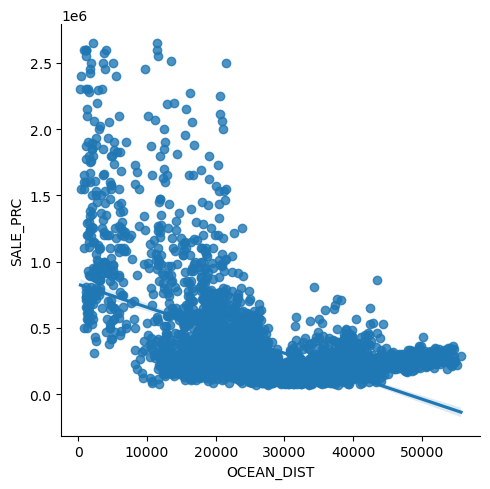

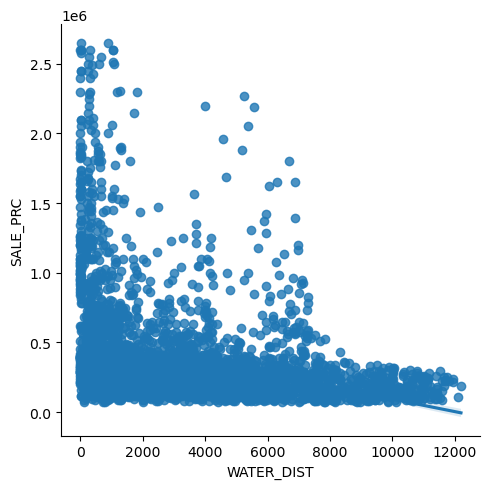

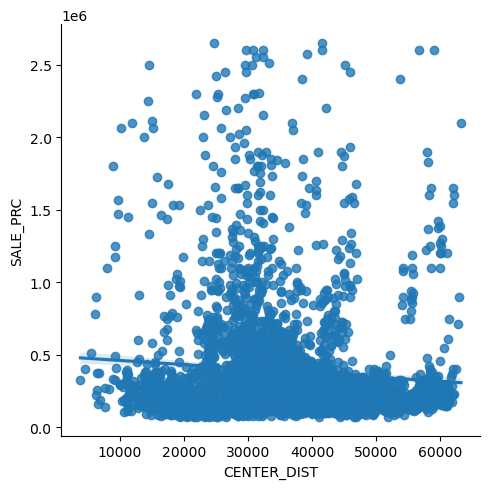

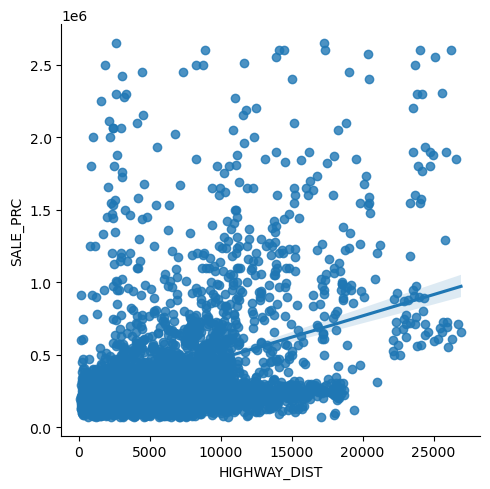

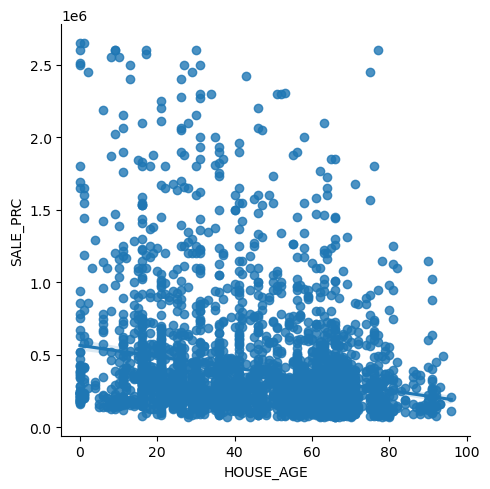

In [9]:
#4.Plotting each independent variable against the dependent variable
for i in xvars:
    sns.lmplot(x=i, y="SALE_PRC", fit_reg=True, data = df)

In [10]:
X = sm.add_constant(X)
X.head()

,const,LAND_SQFOOT,OCEAN_DIST,WATER_DIST,CENTER_DIST,HIGHWAY_DIST,HOUSE_AGE
0,1.0,9375,12811.4,347.6,42815.3,15954.9,67
1,1.0,9375,10648.4,337.8,43504.9,18125.0,63
2,1.0,9375,10574.1,297.1,43530.4,18200.5,61
3,1.0,12450,10156.5,0.0,43797.5,18514.4,63
4,1.0,12800,10836.8,326.6,43599.7,17903.4,42


In [34]:
model1 = sm.OLS.from_formula('SALE_PRC ~ LAND_SQFOOT + OCEAN_DIST + WATER_DIST', df)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               SALE_PRC   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     582.2
Date:                Thu, 16 May 2024   Prob (F-statistic):          2.08e-308
Time:                        19:17:00   Log-Likelihood:                -50660.
No. Observations:                3599   AIC:                         1.013e+05
Df Residuals:                    3595   BIC:                         1.014e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.345e+05   1.85e+04     34.389      0.000    5.98e+05    6.71e+05
LAND_SQFOOT    24.8846      1.593     15.619      0.000      21.761      28.008
OCEAN_DIST    -16.0146      0.508    -31.504      0.000     -17.011     -15.018
WATER_DIST    -10.7518      2.114     -5.085      0.000     -14.897      -6.606
==============================================================================
Omnibus:                     1789.153   Durbin-Watson:                   0.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13482.222
Skew:                           2.250   Prob(JB):                         0.00
Kurtosis:                      11.346   Cond. No.                     1.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#Gathering regression statistics and values for model1
rsquared1 = results1.rsquared
adj_rsquared1 = results1.rsquared_adj
aic1 = results1.aic
bic1 = results1.bic

In [15]:
model2 = sm.OLS.from_formula('SALE_PRC ~ LAND_SQFOOT + OCEAN_DIST + WATER_DIST + CENTER_DIST + HIGHWAY_DIST', df)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               SALE_PRC   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     571.8
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        17:36:43   Log-Likelihood:                -50319.
No. Observations:                3599   AIC:                         1.007e+05
Df Residuals:                    3593   BIC:                         1.007e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.966e+05   2.17e+04     27.454      0.000    5.54e+05    6.39e+05
LAND_SQFOOT     24.3127      1.459     16.667      0.000      21.453      27.173
OCEAN_DIST     -12.0371      0.496    -24.284      0.000     -13.009     -11.065
WATER_DIST     -23.3074      2.042    -11.412      0.000     -27.312     -19.303
CENTER_DIST     -5.6939      0.450    -12.644      0.000      -6.577      -4.811
HIGHWAY_DIST    27.0978      1.013     26.752      0.000      25.112      29.084
==============================================================================
Omnibus:                     1796.422   Durbin-Watson:                   0.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16153.933
Skew:                           2.190   Prob(JB):                         0.00
Kurtosis:                      12.410   Cond. No.                     2.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#Gathering regression statistics and values for model2
rsquared2 = results2.rsquared
adj_rsquared2 = results2.rsquared_adj
aic2 = results2.aic
bic2 = results2.bic

In [17]:
model3 = sm.OLS.from_formula('SALE_PRC ~ LAND_SQFOOT + CENTER_DIST + HIGHWAY_DIST + HOUSE_AGE', df)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               SALE_PRC   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     383.1
Date:                Thu, 16 May 2024   Prob (F-statistic):          3.54e-275
Time:                        17:37:14   Log-Likelihood:                -50734.
No. Observations:                3599   AIC:                         1.015e+05
Df Residuals:                    3594   BIC:                         1.015e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      4.22e+05   2.45e+04     17.210      0.000    3.74e+05     4.7e+05
LAND_SQFOOT     30.3675      1.612     18.835      0.000      27.206      33.529
CENTER_DIST     -8.1381      0.474    -17.159      0.000      -9.068      -7.208
HIGHWAY_DIST    31.8173      1.101     28.899      0.000      29.659      33.976
HOUSE_AGE    -4452.1780    250.707    -17.758      0.000   -4943.721   -3960.635
==============================================================================
Omnibus:                     1871.719   Durbin-Watson:                   0.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16163.375
Skew:                           2.327   Prob(JB):                         0.00
Kurtosis:                      12.280   Cond. No.                     1.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#Gathering regression statistics and values for model3
rsquared3 = results3.rsquared
adj_rsquared3 = results3.rsquared_adj
aic3 = results3.aic
bic3 = results3.bic

In [19]:
#7.Comapring model1, model2 and model3

models = ["model1","model2","model3"]
r_squared = [rsquared1, rsquared2, rsquared3]
adj_r_squared = [adj_rsquared1, adj_rsquared2, adj_rsquared3]
aic = [aic1, aic2, aic3]
bic = [bic1, bic2, bic3]

data = {
    "Model" : models,
    "R-squared": r_squared,
    "Adjusted R_squared": adj_r_squared,
    "AIC": aic,
    "BIC": bic
}
df_stats = pd.DataFrame(data)
print(df_stats)

    Model  R-squared  Adjusted R_squared            AIC            BIC
0  model1   0.326979            0.326417  101328.601622  101353.355267
1  model2   0.443128            0.442353  100650.801168  100687.931636
2  model3   0.298943            0.298163  101477.485060  101508.427116


In [20]:
#Conclusion: Since model2 has higher R-squared and higher Adj R-squared along with lower AIC and BIC, it is the best model.

In [21]:
#8. Checking multicollinearity using variance inflation factor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF) for Multicollinearity:")
print(vif)

#Checking and printing if multicollinearity between independent variables exists excluding constant
if (vif["VIF"] > 5)[1:6].any():
    print("Multicollinearity detected!")
else:
    print("The independent variables are not correlated with each other.")

Variance Inflation Factor (VIF) for Multicollinearity:
       Variable        VIF
0         const  26.729376
1   LAND_SQFOOT   1.058976
2    OCEAN_DIST   1.426065
3    WATER_DIST   1.445540
4   CENTER_DIST   1.273293
5  HIGHWAY_DIST   1.111467
6     HOUSE_AGE   1.031801
The independent variables are not correlated with each other.


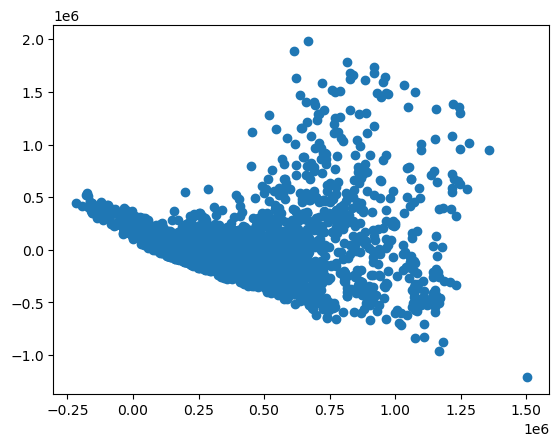

In [22]:
yhat1 = results2.fittedvalues
e1 = results2.resid
plt.scatter(yhat1, e1)
plt.show()

1.7596536558447496e-11


(array([2.000e+00, 2.300e+01, 3.570e+02, 2.224e+03, 7.750e+02, 1.120e+02,
        4.800e+01, 2.900e+01, 2.300e+01, 6.000e+00]),
 array([-1212301.06643988,  -892995.40252875,  -573689.73861762,
         -254384.07470648,    64921.58920465,   384227.25311578,
          703532.91702691,  1022838.58093805,  1342144.24484918,
         1661449.90876031,  1980755.57267145]),
 <BarContainer object of 10 artists>)

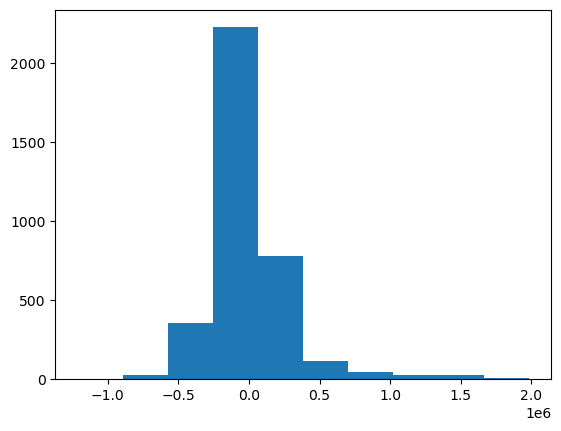

In [23]:
print(e1.mean())
plt.hist(e1)

In [24]:
#Impression: The residuals are normally distributed

In [25]:
#11. Breusch Pagan Statistical test for heteroskedasticity

bp_test = het_breuschpagan(e1, X)
print("Breusch Pagan Test P-Value")
print(bp_test[3])

if bp_test[3] < 0.05:
    print("There is significant evidence of heteroskedasticity.")
else:
    print("There is not enough evidence to conclude that there is heteroskedasticity.")

Breusch Pagan Test P-Value
1.2394205698971714e-145
There is significant evidence of heteroskedasticity.


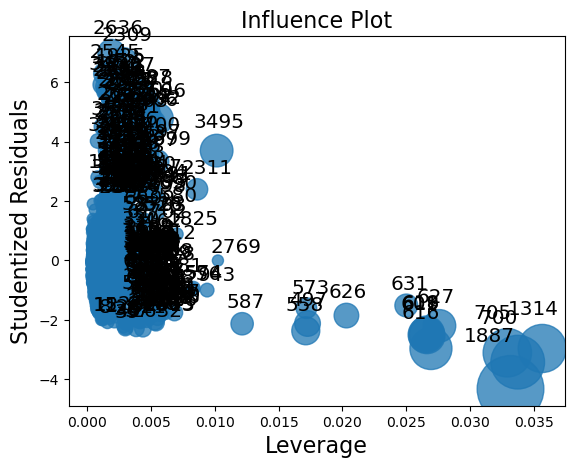

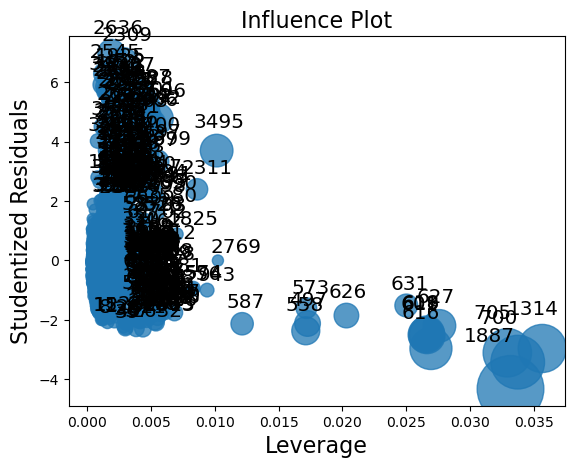

In [26]:
#12. Creating influence pot for outliers
sm.graphics.influence_plot(results2, criterioin = "cooks")

In [27]:
#Impressions:
#From the figure above we can see the majority of data points are away from the center
#From the figure I also believe there is presence of extreme outliers
#I conclude that the data points are problematic

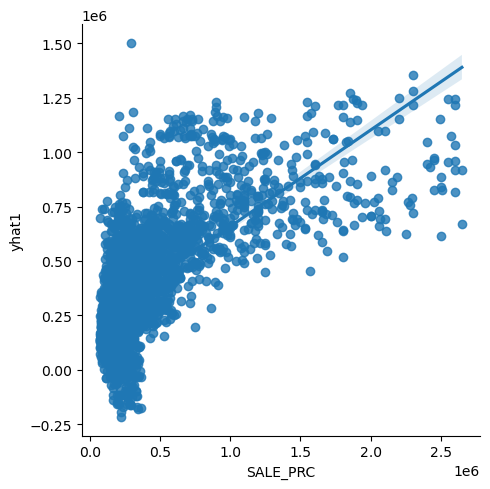

In [28]:
#13. Creating scatterplot of Y vs Y-hat including trendline
#Adiing fitted values to original dataframe
df["yhat1"] = yhat1
sns.lmplot(x = "SALE_PRC", y ="yhat1", fit_reg = True, data=df)

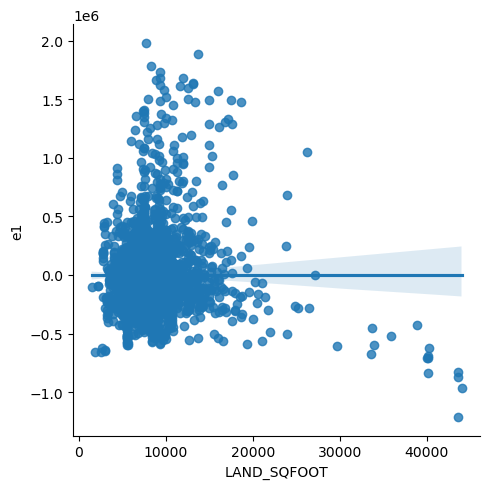

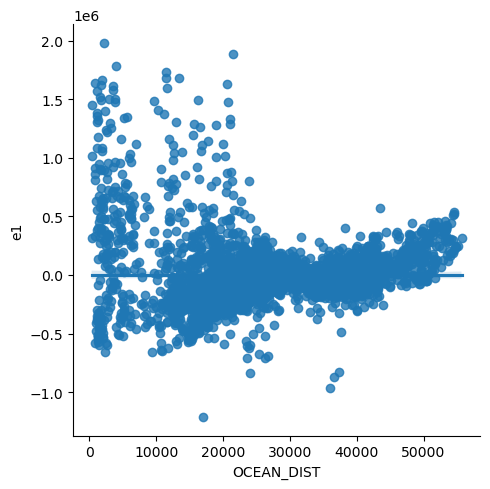

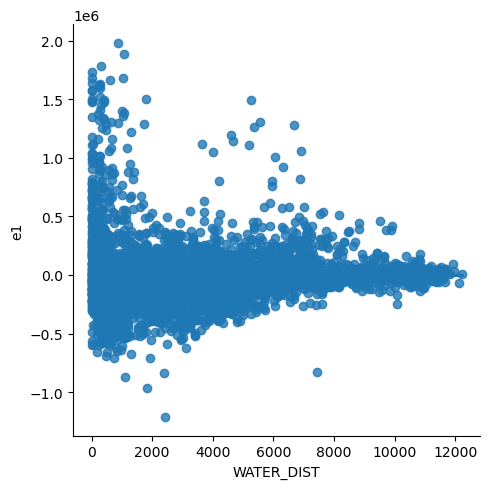

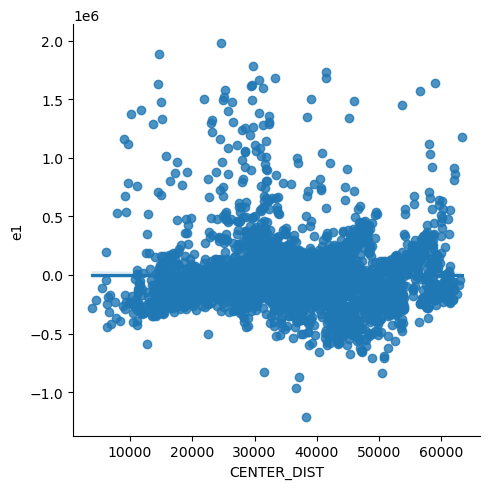

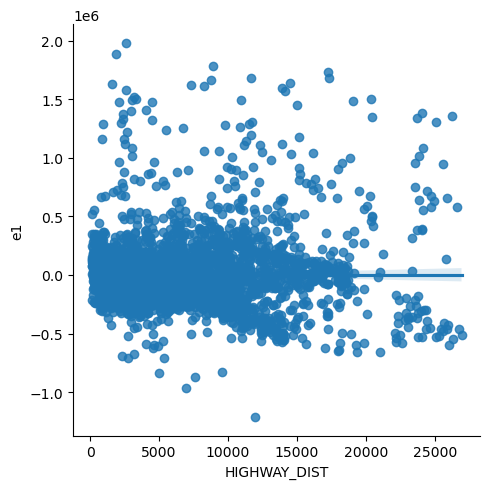

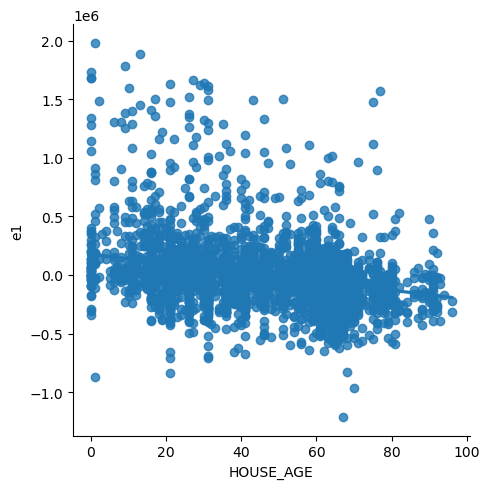

In [29]:
#14. Plotting residuals against x values
#Adding residual values to original data frame
df["e1"] = e1

for i in xvars:
    sns.lmplot(x = i, y = "e1", fit_reg = True, data=df)

In [30]:
#Interpretation:
#While the rest of the vairiables seem fine, the line of house_age variable seems problematic as it is diagonal

In [31]:
#15. Creating a new dataframe and using predict function to calculate estimated  y values
new_df = pd.DataFrame({
    "LAND_SQFOOT":[9000, 9500, 10000, 10500, 11000],
    "OCEAN_DIST":[8000, 9000, 10000, 11100, 12000],
    "WATER_DIST":[80, 150, 210, 480, 670],
    "CENTER_DIST":[41000, 45000, 50000, 53000, 62000],
    "HIGHWAY_DIST":[12000, 14000, 16000, 18000, 20000],
    "HOUSE_AGE":[20, 40, 60, 45, 65],
})

new_df["Estimated_sales_price"] = results2.predict(new_df)
new_df

,LAND_SQFOOT,OCEAN_DIST,WATER_DIST,CENTER_DIST,HIGHWAY_DIST,HOUSE_AGE,Estimated_sales_price
0,9000,8000,80,41000,12000,20,808960.744878
1,9500,9000,150,45000,14000,40,838868.286858
2,10000,10000,210,50000,16000,60,863314.954953
3,10500,11100,480,53000,18000,45,893051.252718
4,11000,12000,670,62000,20000,65,892895.879701
